In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Load in all 2002 NME A class Securities
df = pd.read_csv('November2018sample_newUSE_NME2002.csv')

In [8]:
# Make function to bin the shortfall values
# Bins: 0-1000, 1000-10000, 10000-100000, 100000-500000, 500000-1000000, 1000000-10000000, 10000000+

shortfall = 'HIST INTRST SHRTFLL sum'

def f(row):
    # Positive bins
    if row[shortfall] >=0 and row[shortfall] < 1000:
        bn = '0 : 1,000'
    elif row[shortfall] >=1000 and row[shortfall] < 10000:
        bn = '1,000 : 10,000'
    elif row[shortfall] >=10000 and row[shortfall] < 100000:
        bn = '10,000 : 100,000'
    elif row[shortfall] >=100000 and row[shortfall] < 500000:
        bn = '100,000 : 500,000'
    elif row[shortfall] >=500000 and row[shortfall] < 1000000:
        bn = '500,000 : 1,000,000'
    elif row[shortfall] >=1000000 and row[shortfall] < 10000000:
        bn = '1,000,000 : 10,000,000'
    elif row[shortfall] >=10000000:
        bn = '10,000,000+'
    
    # Negative bins
    elif row[shortfall] >= -1000 and row[shortfall] < 0:
        bn = '0 : -1,000'
    elif row[shortfall] >= -10000 and row[shortfall] < -1000:
        bn = '-1,000 : -10,000'
    elif row[shortfall] >= -100000 and row[shortfall] < -10000:
        bn = '-10,000 : -100,000'
    elif row[shortfall] >= -500000 and row[shortfall] < -100000:
        bn = '-100,000 : -500,000'
    elif row[shortfall] >= -1000000 and row[shortfall] < -500000:
        bn = '-500,000 : -1,000,000'
    elif row[shortfall] >= -10000000 and row[shortfall] < -1000000:
        bn = '-1,000,000 : -10,000,000'
    elif row[shortfall] < 10000000:
        bn = '-10,000,000+'
        
    else:
        bn = 'NaN'

    return bn

df[shortfall + ' bin'] = df.apply(f, axis=1)

shortfall = 'MTG INT SHRTFLL'
df[shortfall + ' bin'] = df.apply(f, axis=1)

shortfall = 'HCLB'
df[shortfall + ' bin'] = df.apply(f, axis=1)

In [7]:
# Count number of each bin for HIST INTRST SHRTFLL
df['HIST INTRST SHRTFLL sum bin'].value_counts()

0 : 1,000                 905
1,000 : 10,000            357
10,000 : 100,000          187
100,000 : 500,000          25
500,000 : 1,000,000         4
1,000,000 : 10,000,000      2
Name: HIST INTRST SHRTFLL sum bin, dtype: int64

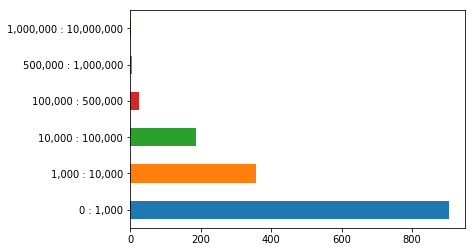

In [14]:
# Frequency chart for HIST INTRST SHRTFLL
df['HIST INTRST SHRTFLL sum bin'].value_counts().plot(kind='barh')

In [15]:
# Count number of each bin for MTG INT SHRTFLL
df['MTG INT SHRTFLL bin'].value_counts()

0 : 1,000           1413
NaN                   36
1,000 : 10,000        27
10,000 : 100,000       4
Name: MTG INT SHRTFLL bin, dtype: int64

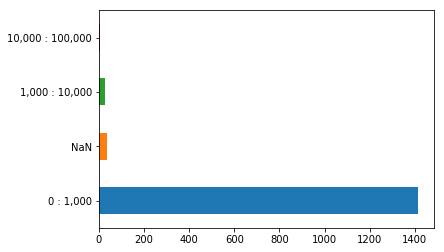

In [16]:
# Frequency chart for MTG INT SHRTFLL
df['MTG INT SHRTFLL bin'].value_counts().plot(kind='barh')

In [17]:
# Frequency chart for HCLB
df['HCLB bin'].value_counts()

NaN          1386
0 : 1,000      94
Name: HCLB bin, dtype: int64

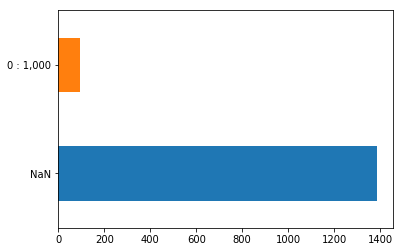

In [18]:
# Frequency chart for HCLB
df['HCLB bin'].value_counts().plot(kind='barh')